[Reference](https://python.plainenglish.io/my-favorite-way-to-smooth-noisy-data-with-python-bd28abe4b7d0)

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

#make a folder to save plots in 
plots_folder = Path('plots')
plots_folder.mkdir(exist_ok=True)

#seed the number random generator to get the same results each time the code is run
np.random.seed(1)

#set a few default plotting preferences (personal taste)
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

In [2]:
fs = 200 #sample rate of 200Hz
t = np.arange(0, 4, 1/fs) #4 seconds of data

#define signal parameters
A = 10 #amplitude of oscillation
w = 2*np.pi*1 #1Hz frequency
tau = 1.7 #time constant for exponential
B = -3 #resting position/DC offset

#original signal and it's derivative
y_signal = A*np.exp(-t/tau)*np.cos(w*t) + B
y_deriv = -A*np.exp(-t/tau)*((1/tau)*np.cos(w*t) + w*np.sin(w*t))

#add noise to signal to get measured dataset
y_noise = np.random.normal(0,1.5,size=t.shape)
y_measured = y_signal + y_noise

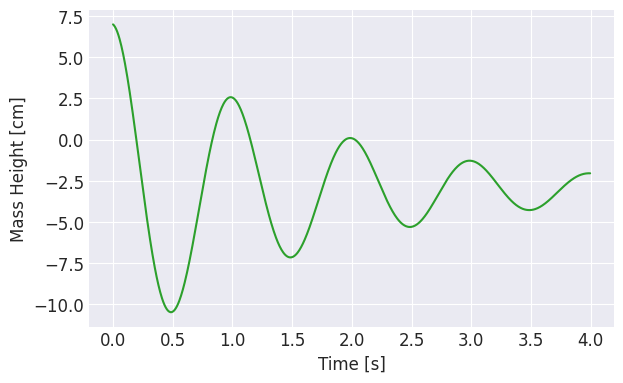

In [3]:
ylabel = 'Mass Height [cm]'
figsize=(6.4, 4)

fig, ax = plt.subplots(figsize=figsize)
ax.plot(t,y_signal ,color='C2')
ax.set_xlabel('Time [s]')
ax.set_ylabel(ylabel)
fig.tight_layout()
fig.savefig(plots_folder/'y_signal.png')

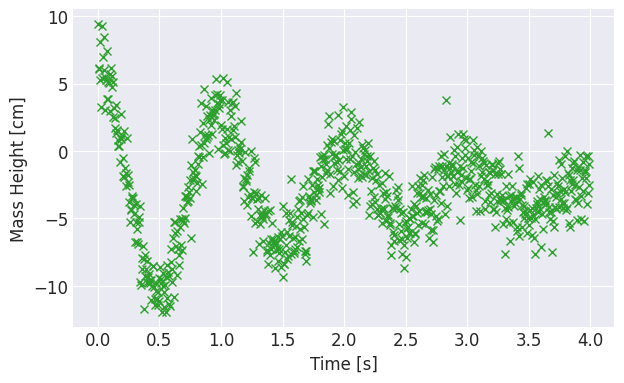

In [4]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(t,y_measured,ls='', marker='x', label='Noisy Data',color='C2')
ax.set_xlabel('Time [s]')
ax.set_ylabel(ylabel)
fig.tight_layout()
fig.savefig(plots_folder/'y_measured.png')

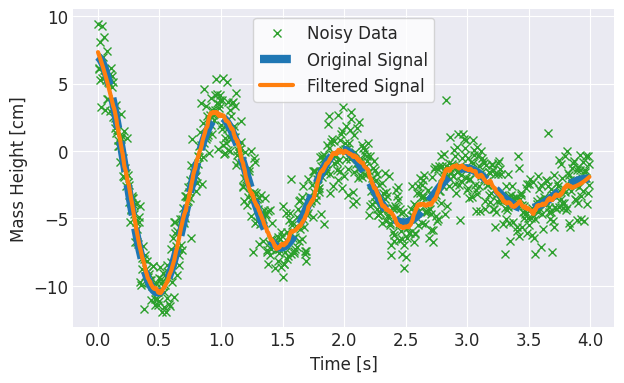

In [5]:
#filter the noisy data using savgol filter
y_filtered = savgol_filter(y_measured, window_length=51, polyorder=2)

#plot the filtered data with the original signal and noisy data
fig, ax = plt.subplots(figsize=figsize)
ax.plot(t,y_measured,ls='', marker='x', label='Noisy Data',color='C2')
ax.plot(t,y_signal, label='Original Signal',lw=6, ls='--')
ax.plot(t,y_filtered, lw=3,label='Filtered Signal',color='C1')

ax.set_xlabel('Time [s]')
ax.set_ylabel(ylabel)
ax.legend(frameon=True, facecolor='white', fancybox=True)
fig.tight_layout()
fig.savefig(plots_folder/'y_filtered.png')

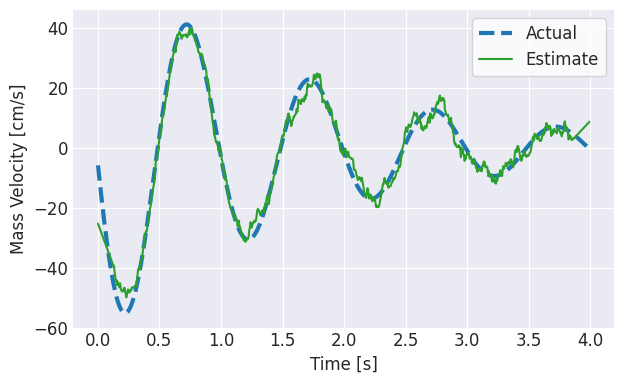

In [6]:
y_filtered_deriv = savgol_filter(y_measured, window_length=51, 
                                 polyorder=2, deriv=1, delta=1/fs)

#plot the filtered data with the original signal and noisy data
fig, ax = plt.subplots(figsize=figsize)
ax.plot(t,y_deriv, label='Actual',lw=3, ls='--')
ax.plot(t,y_filtered_deriv,ls='-', marker='', label='Estimate',color='C2')

ax.set_xlabel('Time [s]')
ax.set_ylabel('Mass Velocity [cm/s]')
ax.legend(frameon=True, facecolor='white', fancybox=True)
fig.tight_layout()
fig.savefig(plots_folder/'y_derivative.png')